# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [1]:
using Clustering, CSV, DataFrames

## 讀取資料

In [8]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [10]:
X = Matrix(data[:, 1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [12]:
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([617601.9107142857 734189.9459016393 … 398555.9485714286 418738.5474683544; 399504.21428571426 810862.8754098361 … 404855.0685714286 787511.7088607595], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3.868603093541992e9, 3.784863740838379e9, 8.956930531298828e7, 6.740235058618164e8, 1.976029744717041e9, 6.258253758146973e8, 1.402054662494873e9, 3.6132858852539062e6, 4.345366158831543e9, 3.3965333364257812e6  …  6.565364133713867e9, 1.5593985659379395e10, 7.847017496307129e9, 5.044867716490723e9, 1.9863866012949707e10, 6.584118918919922e9, 4.614242416956055e9, 9.517660579140137e9, 2.0390386133444824e10, 3.5149924892348633e9], [336, 610, 341, 327, 316, 340, 334, 297, 351, 319, 265, 90, 408, 350, 316], [336, 610, 341, 327, 316, 340, 334, 297, 351, 319, 265, 90, 408, 350, 316], 1.4969866411439217e13, 6, true)

In [13]:
data[!, :cluster] = string.(assignments(result));

In [14]:
result.centers

2×15 Array{Float64,2}:
 6.17602e5  7.3419e5        2.44655e5  …  8.56919e5  3.98556e5  4.18739e5
 3.99504e5  8.10863e5  847642.0           5.66696e5  4.04855e5  7.87512e5

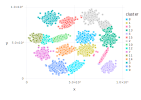

In [16]:
using Gadfly
plot(data, x="x", y="y", color="cluster", Geom.point)